In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns

pl.style.use("seaborn-whitegrid")

In [2]:
anime = pd.read_csv("anime.csv")
rating = pd.read_csv("../../../rating.csv")

In [3]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [5]:
anime.shape

(12294, 7)

In [6]:
types = anime["type"].value_counts()
types

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

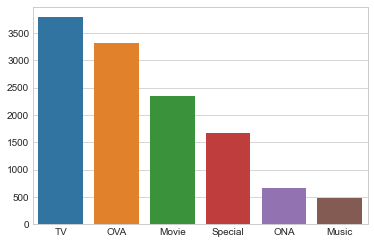

In [7]:
sns.barplot(x=types.keys(), y=types.values)
pl.show()

In [8]:
anime.rename(columns={"rating": "avg_rating"}, inplace=True)
anime.head()

,anime_id,name,genre,type,episodes,avg_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


<AxesSubplot:>

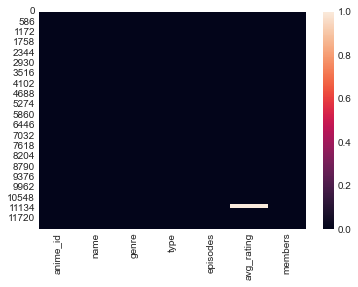

In [9]:
sns.heatmap(anime.isnull())

In [10]:
anime_df = anime.merge(rating, on="anime_id")

In [11]:
anime_df.head()

,anime_id,name,genre,type,episodes,avg_rating,members,user_id,rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [12]:
anime_df.isnull().sum()

anime_id        0
name            0
genre         110
type            4
episodes        0
avg_rating      6
members         0
user_id         0
rating          0
dtype: int64

In [13]:
len(anime_df)

7813727

In [14]:
anime_df.shape

(7813727, 9)

In [15]:
anime_df.dropna(inplace=True)

In [16]:
anime_df.isnull().sum()

anime_id      0
name          0
genre         0
type          0
episodes      0
avg_rating    0
members       0
user_id       0
rating        0
dtype: int64

In [17]:
anime_df.groupby("name").count().sort_values("user_id", ascending=False).head(10)[
    "user_id"
].describe()

count       10.000000
mean     28172.800000
std       4436.430116
min      24283.000000
25%      25255.250000
50%      27344.500000
75%      29117.500000
max      39340.000000
Name: user_id, dtype: float64

In [18]:
user_rating_count_df = pd.DataFrame(anime_df.groupby("name").count()["user_id"]).rename(
    columns ={"user_id": "total_views"}
)
user_rating_count_df.head()

,total_views
name,
&quot;0&quot;,26
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",2
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,782
&quot;Bungaku Shoujo&quot; Memoire,809
&quot;Bungaku Shoujo&quot; Movie,1535


In [19]:
anime_df = anime_df.merge(user_rating_count_df,on = 'name')

In [20]:
anime_df.shape

(7813611, 10)

In [21]:
anime_df.head()

,anime_id,name,genre,type,episodes,avg_rating,members,user_id,rating,total_views
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,2199
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,2199
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,2199
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,2199
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1,2199


In [22]:
anime_df.groupby('name').mean().sort_values('members',ascending=False).head(10)['members']

name
Death Note                          1013917.0
Shingeki no Kyojin                   896229.0
Sword Art Online                     893100.0
Fullmetal Alchemist: Brotherhood     793665.0
Angel Beats!                         717796.0
Code Geass: Hangyaku no Lelouch      715151.0
Naruto                               683297.0
Steins;Gate                          673572.0
Mirai Nikki (TV)                     657190.0
Toradora!                            633817.0
Name: members, dtype: float64

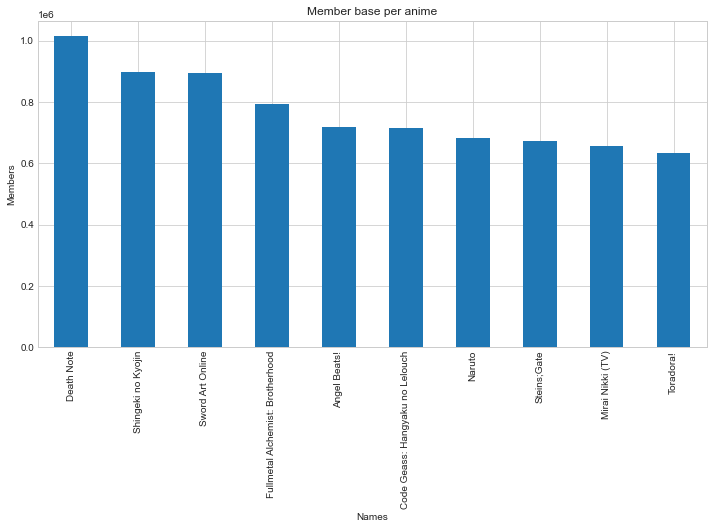

In [23]:
anime_df.groupby("name").mean().sort_values("members", ascending=False).head(10)[
    "members"
].plot(kind="bar", figsize=(12, 6))
pl.xlabel('Names')
pl.ylabel('Members')
pl.title('Member base per anime')
pl.show()

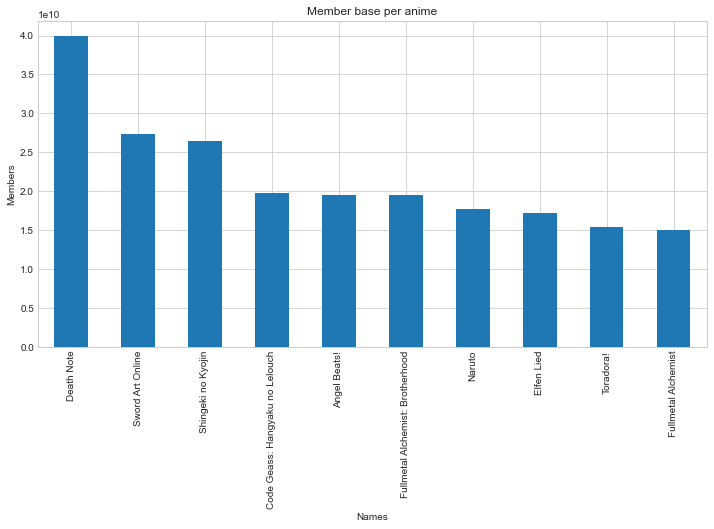

In [24]:
anime_df.groupby("name").sum().sort_values("members", ascending=False).head(10)[
    "members"
].plot(kind="bar", figsize=(12, 6))
pl.xlabel('Names')
pl.ylabel('Members')
pl.title('Member base per anime')
pl.show()

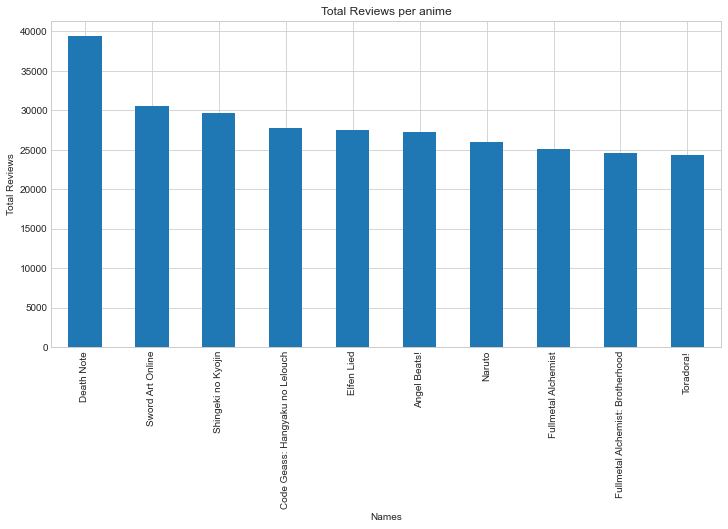

In [25]:
anime_df.groupby("name").mean().sort_values("total_views", ascending=False).head(10)[
    "total_views"
].plot(kind="bar", figsize=(12, 6))
pl.xlabel("Names")
pl.ylabel("Total Reviews")
pl.title("Total Reviews per anime")
pl.show()

In [26]:
anime_df.groupby("name").mean().sort_values("total_views", ascending=False).head(10)[
    "total_views"
]

name
Death Note                          39340.0
Sword Art Online                    30583.0
Shingeki no Kyojin                  29584.0
Code Geass: Hangyaku no Lelouch     27718.0
Elfen Lied                          27506.0
Angel Beats!                        27183.0
Naruto                              25925.0
Fullmetal Alchemist                 25032.0
Fullmetal Alchemist: Brotherhood    24574.0
Toradora!                           24283.0
Name: total_views, dtype: float64

In [27]:
anime_df.groupby("name").mean().sort_values("members", ascending=False).head(10)[
    "members"
]

name
Death Note                          1013917.0
Shingeki no Kyojin                   896229.0
Sword Art Online                     893100.0
Fullmetal Alchemist: Brotherhood     793665.0
Angel Beats!                         717796.0
Code Geass: Hangyaku no Lelouch      715151.0
Naruto                               683297.0
Steins;Gate                          673572.0
Mirai Nikki (TV)                     657190.0
Toradora!                            633817.0
Name: members, dtype: float64

In [28]:
anime_df['members'].describe()

count    7.813611e+06
mean     1.786234e+05
std      1.881766e+05
min      2.900000e+01
25%      4.403000e+04
50%      1.104700e+05
75%      2.442680e+05
max      1.013917e+06
Name: members, dtype: float64

In [29]:
user_count_df = (
    anime_df.groupby("user_id")
    .count()[["anime_id"]]
    .rename(columns={"anime_id": "animes_reviewed_by_this_user"})
)
user_count_df.head()

,animes_reviewed_by_this_user
user_id,
1,153
2,3
3,94
4,52
5,467


In [30]:
user_count_df['animes_reviewed_by_this_user'].describe()

count    73515.000000
mean       106.285942
std        153.074216
min          1.000000
25%         18.000000
50%         57.000000
75%        136.000000
max      10225.000000
Name: animes_reviewed_by_this_user, dtype: float64

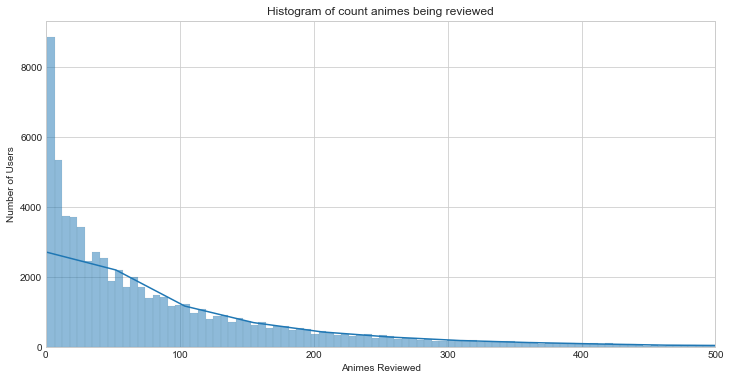

In [31]:
pl.figure(figsize=(12,6))
sns.histplot(user_count_df,x='animes_reviewed_by_this_user',kde=True)
pl.xlim(0,500)
pl.xlabel('Animes Reviewed')
pl.ylabel('Number of Users')
pl.title('Histogram of count animes being reviewed')
pl.show()

In [32]:
anime_df = anime_df.merge(user_count_df,on = 'user_id')
anime_df.head()

,anime_id,name,genre,type,episodes,avg_rating,members,user_id,rating,total_views,animes_reviewed_by_this_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,2199,131
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,99,10,24574,131
2,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,99,9,19283,131
3,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749,99,10,17854,131
4,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888,99,9,24242,131


<AxesSubplot:xlabel='user_id'>

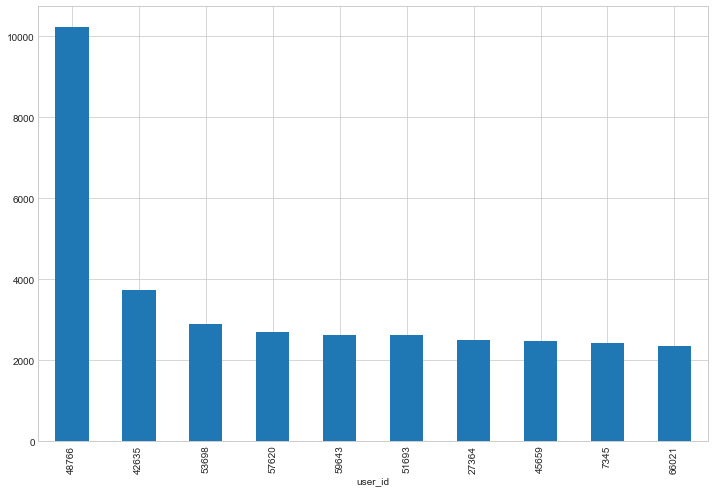

In [33]:
anime_df.groupby("user_id").mean().sort_values(
    "animes_reviewed_by_this_user", ascending=False
).head(10)["animes_reviewed_by_this_user"].plot(kind="bar", figsize=(12, 8))

In [34]:
df = anime_df.copy()

In [35]:
df.shape

(7813611, 11)

In [36]:
df.isnull().sum()

anime_id                        0
name                            0
genre                           0
type                            0
episodes                        0
avg_rating                      0
members                         0
user_id                         0
rating                          0
total_views                     0
animes_reviewed_by_this_user    0
dtype: int64

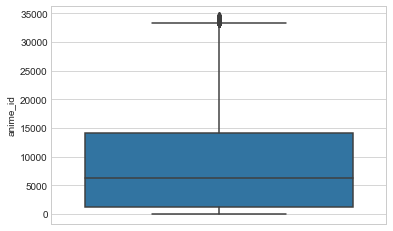

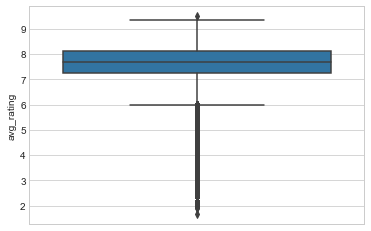

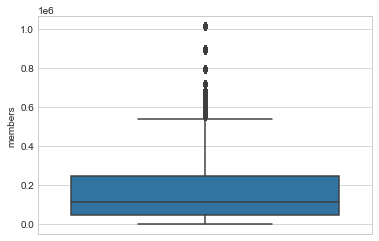

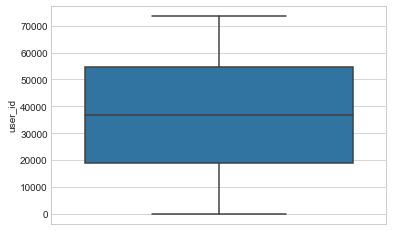

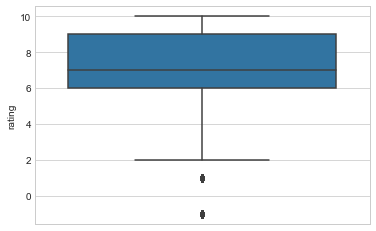

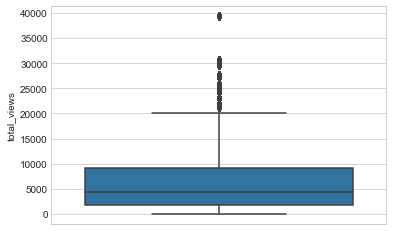

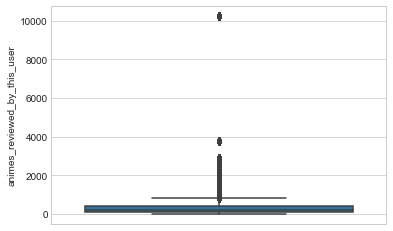

In [37]:
for c in df.columns:
    if df[c].dtypes !='O':
        sns.boxplot(y=df[c])
        pl.show()


In [38]:
df = df[
    (df["members"] > df["members"].median())
    & (df["total_views"] > df["total_views"].median())
    & (df["animes_reviewed_by_this_user"] > df["animes_reviewed_by_this_user"].median())
]
df.head()

,anime_id,name,genre,type,episodes,avg_rating,members,user_id,rating,total_views,animes_reviewed_by_this_user
275,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,244,10,24574,277
276,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,244,10,19283,277
277,23273,Shigatsu wa Kimi no Uso,"Drama, Music, Romance, School, Shounen",TV,22,8.92,416397,244,10,9448,277
278,12355,Ookami Kodomo no Ame to Yuki,"Fantasy, Slice of Life",Movie,1,8.84,226193,244,9,7709,277
279,30276,One Punch Man,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,12,8.82,552458,244,9,13374,277


In [39]:
df.shape

(1449228, 11)

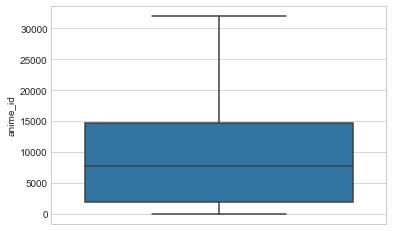

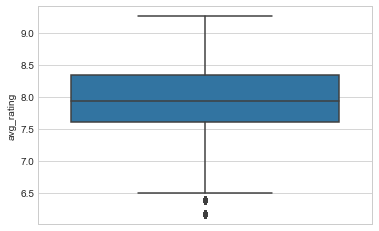

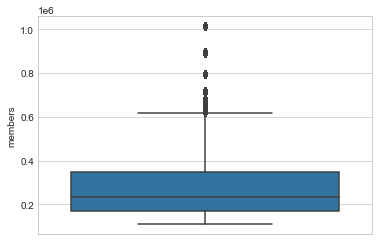

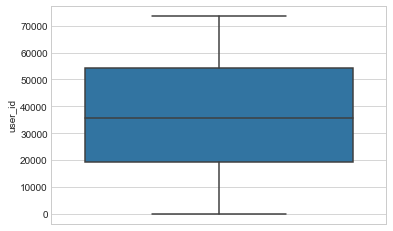

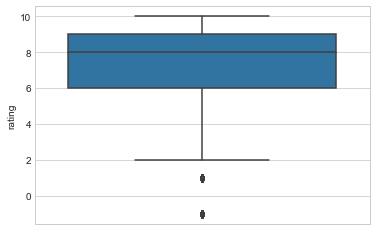

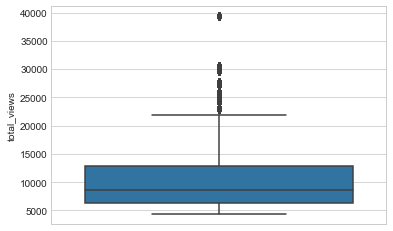

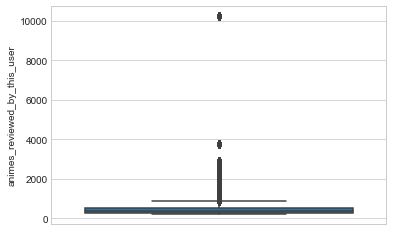

In [40]:
for c in df.columns:
    if df[c].dtypes !='O':
        sns.boxplot(y=df[c])
        pl.show()

In [41]:
df.head()

,anime_id,name,genre,type,episodes,avg_rating,members,user_id,rating,total_views,animes_reviewed_by_this_user
275,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,244,10,24574,277
276,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,244,10,19283,277
277,23273,Shigatsu wa Kimi no Uso,"Drama, Music, Romance, School, Shounen",TV,22,8.92,416397,244,10,9448,277
278,12355,Ookami Kodomo no Ame to Yuki,"Fantasy, Slice of Life",Movie,1,8.84,226193,244,9,7709,277
279,30276,One Punch Man,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,12,8.82,552458,244,9,13374,277


<AxesSubplot:>

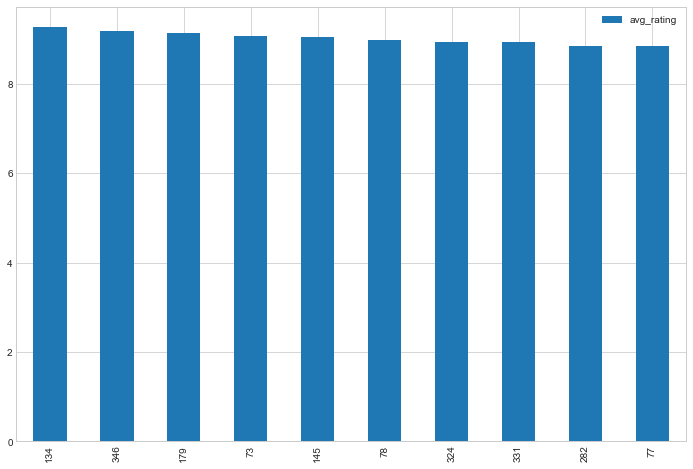

In [42]:
df.groupby("name")["avg_rating"].mean().reset_index().sort_values(
    "avg_rating", ascending=False
).head(10).plot(kind="bar", figsize=(12, 8))

In [43]:
df.groupby("name")["avg_rating"].mean().reset_index().sort_values(
    "avg_rating", ascending=False
).head(10)

,name,avg_rating
134,Fullmetal Alchemist: Brotherhood,9.26
346,Steins;Gate,9.17
179,Hunter x Hunter (2011),9.13
73,Clannad: After Story,9.06
145,Gintama,9.04
78,Code Geass: Hangyaku no Lelouch R2,8.98
324,Sen to Chihiro no Kamikakushi,8.93
331,Shigatsu wa Kimi no Uso,8.92
282,Ookami Kodomo no Ame to Yuki,8.84
77,Code Geass: Hangyaku no Lelouch,8.83


<AxesSubplot:xlabel='name'>

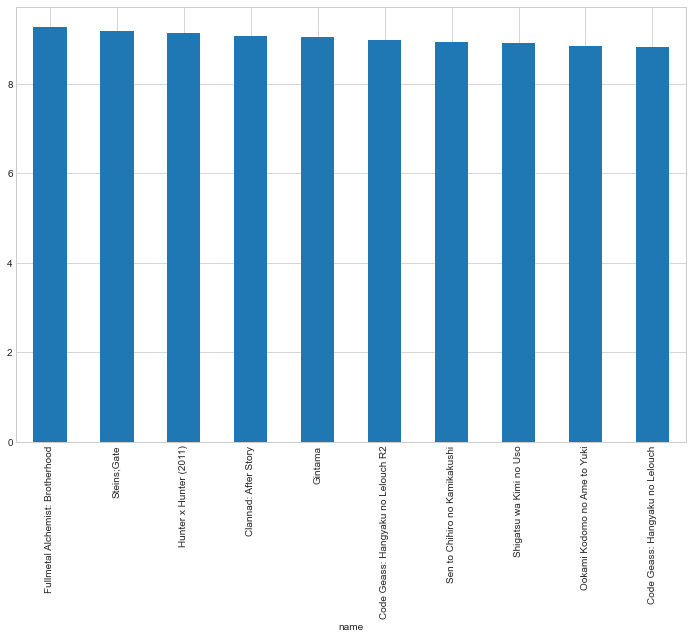

In [44]:
df.groupby("name").mean().sort_values("avg_rating", ascending=False).head(10)[
    "avg_rating"
].plot(kind="bar", figsize=(12, 8))

In [47]:
v = df['total_views']
R = df['avg_rating']
C = df['avg_rating'].mean()
m = df['avg_rating'].quantile(0.70)

In [52]:
df['weighted_average'] = ((R*v)+(C*m)/(v+m))